## Predicting Bike Sharing Patterns

#### Importing libraries and dataset
  Here dataset is in CSV file so we use read csv function to import it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
df1 = pd.read_csv('hour.csv')

Describing the dataframe to see how values are distributed

In [3]:
df1.describe

<bound method NDFrame.describe of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81    

## Data Exploratory Analysis 

#### Plotting the features with dependent variable to describe the correlations between the perticular columns on dependent variable

This plot describe the correaltion between the individual month to bike count. It shows at third and ninth month the bike count is very high and in first and second month the count is very low

Text(0.5, 0, 'weathersit')

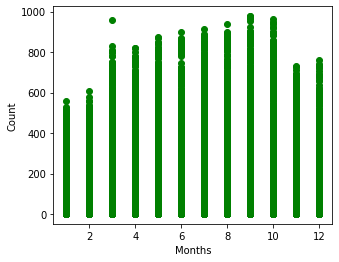

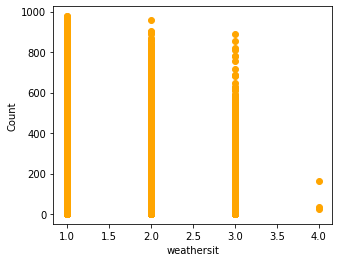

In [4]:
plt.figure()
X = df1['mnth']
Y = df1['cnt']
plt.scatter(X,Y, color='green')
plt.gca().set_ylabel('Count')
plt.gca().set_xlabel('Months')

plt.figure()
X = df1['weathersit']
Y = df1['cnt']
plt.scatter(X,Y, color='orange')
plt.gca().set_ylabel('Count')
plt.gca().set_xlabel('weathersit')

This scatter plots describe the correlations between seasons and bike count in 3rd season the count was very high while 1st season is low. 
Other scatter plot describe the correlation between the hourly bike rides with total number of rides

Text(0.5, 0, 'hr')

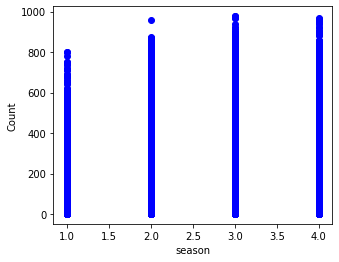

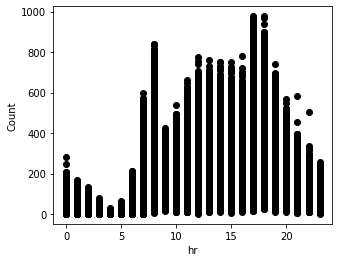

In [5]:
plt.figure()

Y = df1['cnt']
X = df1['season']
_ = plt.scatter(X,Y, color='blue')
plt.gca().set_ylabel('Count')
plt.gca().set_xlabel('season')


plt.figure()
Y = df1['cnt']
X = df1['hr']
_ = plt.scatter(X,Y, color='black')
plt.gca().set_ylabel('Count')
plt.gca().set_xlabel('hr')

This scatter plot describe the correlation between the holiday and weekday with bike count 
0 - Not holiday
1 - holiday


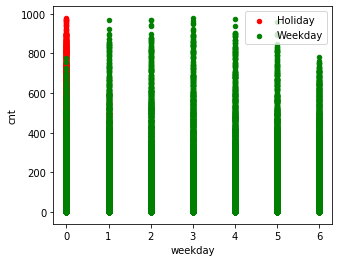

In [6]:
ax1 = df1.plot(kind='scatter', x='holiday', y='cnt', color='r', label='Holiday')    
ax2 = df1.plot(kind='scatter', x='weekday', y='cnt', color='g', label='Weekday', ax=ax1)    
#ax3 = df.plot(kind='scatter', x='workingday', y='cnt', color='b', label='Working day', ax=ax1)

This describe the corelation between the bike count and working day how it is effected. 1-means working day 0- means non working day
this shows that during the working day the people are tended to use bikes more often

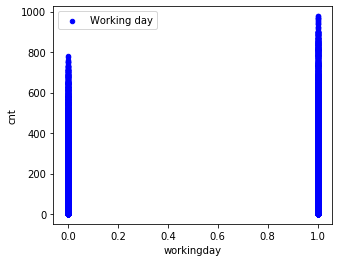

In [7]:
ax3 = df1.plot(kind='scatter', x='workingday', y='cnt', color='b', label='Working day')

Below is a plot showing the number of bike riders over the first 10 days or so in the data set. (Some days don't have exactly 24 entries in the data set, so it's not exactly 10 days.) You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model

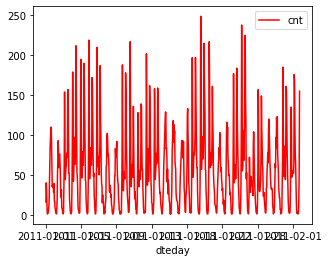

In [8]:
df1[:48*15].plot(x='dteday', y='cnt', color='red')

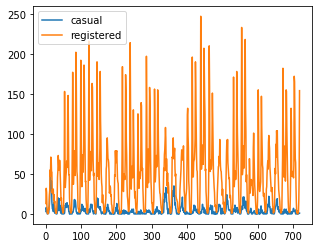

In [9]:
casual_resgistered=pd.concat([df1.casual[:48*15], df1.registered[:48*15]], axis='columns')
# Create subplots from 'annual'
casual_resgistered.plot(subplots=False)
# Display the subplots
plt.show()

## Scaling the dataset

Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to get_dummies().

By plotting above we have seen that some labels are highly corelated and some are less corelated for better results we have to rule out the high and low corelated labels and we have to keep only moderatly corealted labels for better accuracy. 
So we can drop the labels which are high and least corelated to dependent variable

In [10]:
dummy_var = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_var:
    dummies = pd.get_dummies(df1[each], prefix=each, drop_first=False)
    df1 = pd.concat([df1, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
clean_df = df1.drop(fields_to_drop, axis=1)
clean_df.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


To make training the network easier, we have to standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.
The scaling factors are saved so we can go backwards when we use the network for predictions

In [11]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = clean_df[each].mean(), clean_df[each].std()
    scaled_features[each] = [mean, std]
    clean_df.loc[:, each] = (clean_df[each] - mean)/std

In [12]:
# Save data for approximately the last 21 days 
test_data = clean_df[-21*24:]

# Now remove the test data from the data set 
clean_df = clean_df[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = clean_df.drop(target_fields, axis=1), clean_df[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [13]:
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Building Neural Network


Sigmoid activation function

In [14]:
def sigmoid(z):
  s = 1 / 1.0/(1.0+np.exp(-z))

Relu activation function

In [15]:
def relu(z):
  return np.max(0, z)

Relu back propagation function

In [16]:
def relu_backward(dA, cache):
  Z= cache
  dZ = np.array(dA, copy=True)

  dZ[Z <= 0] = 0

  return dZ

Sigmoid back propagation function

In [17]:
def sigmoid_backward(dA, cache):
  Z = cache

  s= 1/(1+np.exp(-Z))
  dZ = dA * s * (1-s)

  return dZ

## Building Model

The class performs the following activities

1. Initialize parameters
2.apply the sigmoid activation function
3. Model training method 
4. model eval method

In [18]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        # Note: in Python, you can define a function with a lambda expression,
        self.activation_function = lambda x : 1.0/(1.0+np.exp(-x))  # Replace 0 with your sigmoid calculation.
                    
    
    def train(self, features, targets):

        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            #### Implement the forward pass here ####
            ### Forward pass ###
            hidden_inputs = np.dot(X, self.weights_input_to_hidden) # signals into hidden layer
            hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

            final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
            final_outputs = final_inputs # signals from final output layer
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            error = y - final_outputs  # Output layer error is the difference between desired target and actual output.
            
            hidden_error = np.dot(error, self.weights_hidden_to_output.T)

            output_error_term = error
            hidden_error_term = hidden_error * hidden_outputs * (1 - hidden_outputs)

            # Weight step (input to hidden)
            delta_weights_i_h += hidden_error_term * X[:, None] 
            # Weight step (hidden to output)
            delta_weights_h_o += output_error_term * hidden_outputs[:, None]

        self.weights_hidden_to_output += self.lr * delta_weights_h_o / n_records # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * delta_weights_i_h / n_records # update input-to-hidden weights with gradient descent step
 
    def run(self, features):
                
        hidden_inputs = np.dot(features, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs

Calculate the mean square error

In [19]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Training model

1. Tuning hyper-parameters
2. loading the model
3. Training model on the training set
4. evaluating the model on the validation set

This ommits the training and validation losses



In [20]:
import sys

### Set the hyperparameters here ###
iterations = 1000
learning_rate = 0.2
hidden_nodes = 16
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.9% ... Training loss: 0.284 ... Validation loss: 0.453

## Plotting the Train and Val Loss

(0.2, 1)

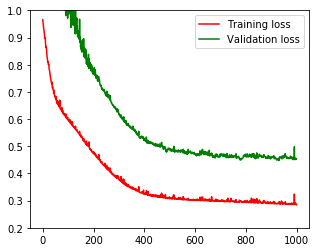

In [21]:
plt.plot(losses['train'], label='Training loss', color='red')
plt.plot(losses['validation'], label='Validation loss', color='green')
plt.legend()
#_ = plt.ylim()
plt.ylim(0.2, 1)

## Evaluating the results graphically

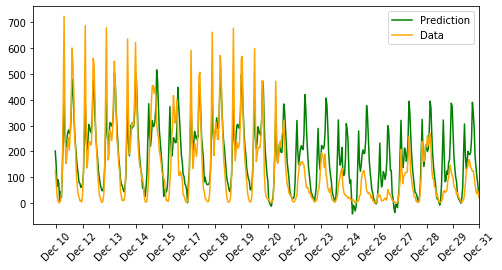

In [22]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
# Make Predictions on `test_features`
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction', color='green')
# Rescale data back to original shape
ax.plot((test_targets['cnt']*std + mean).values, label='Data', color='orange')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(df1.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[1::30])
_ = ax.set_xticklabels(dates[1::30], rotation=45)